In [2]:
# Define components
using Ai4EComponentLib
using Ai4EComponentLib.CompressedAirSystem
using ModelingToolkit, DifferentialEquations

In [125]:
# @variables p(t) [input = true]
@variables qm(t) [output = true]
# @variables tout(t) [output = true]


inletBoundary = Dict(
    "p" => 10.0e5,
    "T" => 300,
    "qm" => 5
)

outletBoundary = Dict(
    # "p" => 1.0e5,
    # "T" => 300,
    "qm" => qm
)

@named inletSource = Source(boundary=inletBoundary)
@named pipe1 = TransitionPipe(D=0.9, L=200)
@named outletSource = Source(boundary=outletBoundary)

# Connect components
eqs = [
    connect(inletSource.source, pipe1.inlet)
    connect(pipe1.outlet, outletSource.source)
]

@named connects = ODESystem(eqs, t)
@named model = compose(connects, inletSource, pipe1, outletSource)

# Simplify the system and solve
sys = structural_simplify(model)

┌ Warning: source contains 1 flow variables, yet 2 regular (non-flow, non-stream, non-input, non-output) variables. This could lead to imbalanced model that are difficult to debug. Consider marking some of the regular variables as input/output variables.
└ @ ModelingToolkit /Users/jerell/.julia/packages/ModelingToolkit/rrbUl/src/systems/connectors.jl:40
┌ Warning: inlet contains 1 flow variables, yet 2 regular (non-flow, non-stream, non-input, non-output) variables. This could lead to imbalanced model that are difficult to debug. Consider marking some of the regular variables as input/output variables.
└ @ ModelingToolkit /Users/jerell/.julia/packages/ModelingToolkit/rrbUl/src/systems/connectors.jl:40
┌ Warning: outlet contains 1 flow variables, yet 2 regular (non-flow, non-stream, non-input, non-output) variables. This could lead to imbalanced model that are difficult to debug. Consider marking some of the regular variables as input/output variables.
└ @ ModelingToolkit /Users/jerell/

ModelingToolkit.ExtraVariablesSystemException: ExtraVariablesSystemException: The system is unbalanced. There are 46 highest order derivative variables and 45 equations.
More variables than equations, here are the potential extra variable(s):
 (pipe1₊p(t))[2]
 (pipe1₊p(t))[3]
 (pipe1₊p(t))[4]
 (pipe1₊p(t))[5]
 (pipe1₊p(t))[6]
 (pipe1₊p(t))[7]
 (pipe1₊p(t))[8]
 (pipe1₊p(t))[9]
 (pipe1₊p(t))[10]
 (pipe1₊qm(t))[2]
 (pipe1₊qm(t))[3]
 (pipe1₊qm(t))[4]
 (pipe1₊qm(t))[5]
 (pipe1₊qm(t))[6]
 (pipe1₊qm(t))[7]
 (pipe1₊qm(t))[8]
 (pipe1₊qm(t))[9]
 (pipe1₊qm(t))[1]
 (pipe1₊qm(t))[10]
 pipe1₊outlet₊qv(t)
 outletSource₊source₊qv(t)

In [114]:
prob = ODAEProblem(sys, [], (1.0, 100.0))

sol = solve(prob, Rodas4())

UndefVarError: UndefVarError: `inletSource₊source₊ρ(t)` not defined

In [115]:
using Plots

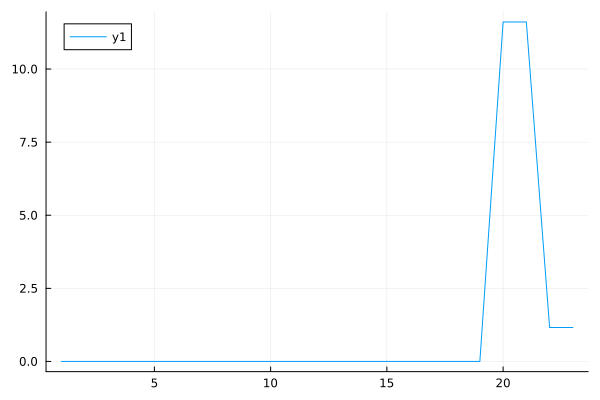

In [116]:
plot(sol.u)

In [117]:
sol

retcode: Unstable
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 1-element Vector{Float64}:
 1.0
u: 1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.60995205089803, 11.60995205089803, 1.1609952050898031, 1.1609952050898031]

In [118]:
typeof(sol)

ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, ModelingToolkit.var"#f#533"{RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋arg1, :ˍ₋arg2, :t), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0x1963a31d, 0xf7e9e9bd, 0x3bcad2f9, 0x42f8c746, 0x226ebf01), Nothing}, RuntimeGeneratedFunctions.RuntimeGeneratedFunction{(:ˍ₋out, :ˍ₋arg1, :ˍ₋arg2, :t), ModelingToolkit.var"#_RGF_ModTag", ModelingToolkit.var"#_RGF_ModTag", (0x61110894, 0xba391da2, 0x4e5cf578, 0x8cb70046, 0x4932b499), Nothing}}, Matrix{Float64}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Vector{Symbol}, Symbol, Vector{Symbol}, ModelingToolkit.var"#583#generated_observed#541"{Bool, ODESystem, Dict{Any, Any}}, Nothing, ODESystem}, Base.Pairs{Symbol, Union{}, Tuple{}, Name

In [119]:
sol[pipe1.p]

1-element Vector{Vector{Float64}}:
 [1.0e6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100000.0]

In [120]:
sol[pipe1.qm]

1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [121]:
sol[inletSource.source.qm]

1-element Vector{Float64}:
 -0.0

In [122]:
sol[outletSource.source.qm]

1-element Vector{Float64}:
 0.0